# Desperdício de Alimentos Global por Categorias e Regiões

O tema deste projeto será a análise do desperdício de alimentos em diferentes regiões do mundo, focando nas categorias de desperdício: doméstico, varejo e serviços de alimentação. O objetivo é identificar padrões regionais de desperdício e propor insights que possam ser usados para políticas públicas e estratégias de redução.

Bases de Dados: Utilizaremos uma base de dados com informações sobre o desperdício de alimentos, que contém os seguintes campos principais:

País
Região
Desperdício Domiciliar (kg/pessoa/ano)
Desperdício no Varejo (kg/pessoa/ano)
Desperdício em Serviços de Alimentação (kg/pessoa/ano)
Essa base de dados é adequada para responder a questões relacionadas à geografia do desperdício e os principais setores responsáveis.

Com base no objetivo, as perguntas a serem respondidas são:

1) Quais regiões do mundo têm os maiores índices de desperdício de alimentos?<p>
2) Qual o desperdício médio pelas categorias: domicílios, varejo e serviços de alimentação?<p>
3) Quais países apresentam o menor e o maior desperdício per capita?<p>
4) Existe uma correlação entre a confiança nas estimativas e os valores de desperdício?
5) Existe uma correlação entre o IDH e o desperdício de comida?

As bases utilizadas foram encontradas no Kaggle. 
Desperdício de comida: https://www.kaggle.com/datasets/joebeachcapital/food-waste/data
IDH: https://www.kaggle.com/datasets/iamsouravbanerjee/human-development-index-dataset

## ETL 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

df = pd.read_csv("Food Waste data and research - by country.csv")
base_idh = pd.read_csv("Human Development Index - Full.csv")

In [2]:
df.head(10)

,Country,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),Confidence in estimate,M49 code,Region,Source
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,https://www.unep.org/resources/report/unep-foo...
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,https://www.unep.org/resources/report/unep-foo...
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,https://www.unep.org/resources/report/unep-foo...
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,https://www.unep.org/resources/report/unep-foo...
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,https://www.unep.org/resources/report/unep-foo...
5,Antigua and Barbuda,113,74,7178,13,1244,26,2483,Low Confidence,28,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...
6,Argentina,116,72,3243563,16,700380,28,1238100,Very Low Confidence,32,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...
7,Armenia,137,93,275195,16,46259,28,81775,Very Low Confidence,51,Western Asia,https://www.unep.org/resources/report/unep-foo...
8,Aruba,113,74,7858,13,1362,26,2718,Low Confidence,533,Latin America and the Caribbean,https://www.unep.org/resources/report/unep-foo...
9,Australia,133,102,2563110,9,238248,22,546340,High Confidence,36,Australia and New Zealand,https://www.unep.org/resources/report/unep-foo...


### Verificando e tratando a base escolhida

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 12 columns):
 #   Column                                  Non-Null Count  Dtype 
---  ------                                  --------------  ----- 
 0   Country                                 214 non-null    object
 1   combined figures (kg/capita/year)       214 non-null    int64 
 2   Household estimate (kg/capita/year)     214 non-null    int64 
 3   Household estimate (tonnes/year)        214 non-null    int64 
 4   Retail estimate (kg/capita/year)        214 non-null    int64 
 5   Retail estimate (tonnes/year)           214 non-null    int64 
 6   Food service estimate (kg/capita/year)  214 non-null    int64 
 7   Food service estimate (tonnes/year)     214 non-null    int64 
 8   Confidence in estimate                  214 non-null    object
 9   M49 code                                214 non-null    int64 
 10  Region                                  214 non-null    object
 11  Source

In [4]:
df.isnull().sum()

Country                                   0
combined figures (kg/capita/year)         0
Household estimate (kg/capita/year)       0
Household estimate (tonnes/year)          0
Retail estimate (kg/capita/year)          0
Retail estimate (tonnes/year)             0
Food service estimate (kg/capita/year)    0
Food service estimate (tonnes/year)       0
Confidence in estimate                    0
M49 code                                  0
Region                                    0
Source                                    0
dtype: int64

In [5]:
df.describe()

,combined figures (kg/capita/year),Household estimate (kg/capita/year),Household estimate (tonnes/year),Retail estimate (kg/capita/year),Retail estimate (tonnes/year),Food service estimate (kg/capita/year),Food service estimate (tonnes/year),M49 code
count,214.000000,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000,2.140000e+02,214.000000
mean,126.794393,84.294393,2.658896e+06,15.116822,5.520454e+05,27.383178,1.138859e+06,433.971963
std,22.157879,18.313705,8.596906e+06,5.767840,2.195578e+06,6.508420,5.380459e+06,252.185786
min,61.000000,33.000000,8.500000e+02,3.000000,1.380000e+02,3.000000,2.760000e+02,4.000000
25%,115.000000,74.000000,6.831550e+04,13.000000,1.250925e+04,26.000000,2.239125e+04,219.000000
50%,123.000000,80.000000,5.205080e+05,16.000000,1.006500e+05,28.000000,1.884660e+05,432.000000
75%,137.750000,95.000000,2.111314e+06,16.000000,3.568158e+05,28.000000,6.307618e+05,645.250000
max,260.000000,189.000000,9.164621e+07,79.000000,2.242470e+07,90.000000,6.537774e+07,894.000000


In [6]:
df.duplicated().sum()

np.int64(0)

In [7]:
df.columns

Index(['Country', 'combined figures (kg/capita/year)',
       'Household estimate (kg/capita/year)',
       'Household estimate (tonnes/year)', 'Retail estimate (kg/capita/year)',
       'Retail estimate (tonnes/year)',
       'Food service estimate (kg/capita/year)',
       'Food service estimate (tonnes/year)', 'Confidence in estimate',
       'M49 code', 'Region', 'Source'],
      dtype='object')

Entendimento das Variáveis:<p>
<b>Country:</b> País ao qual os dados se referem.<p>
<b>Combined figures (kg/capita/year):</b> Total de desperdício de comida por pessoa por ano.<p>
<b>Household estimate (kg/capita/year):</b> Estimativa de desperdício por pessoa em domicílios.<p>
<b>Household estimate (tonnes/year):</b> Estimativa de desperdício de comida em domicílios (em toneladas).<p>
<b>Retail estimate (kg/capita/year):</b> Estimativa de desperdício por pessoa no varejo.<p>
<b>Retail estimate (tonnes/year):</b> Estimativa de desperdício de comida no varejo (em toneladas).<p>
<b>Food service estimate (kg/capita/year):</b> Estimativa de desperdício por pessoa no setor de serviços de alimentação.<p>
<b>Food service estimate (tonnes/year):</b> Estimativa de desperdício no setor de serviços de alimentação (em toneladas).<p>
<b>Confidence in estimate:</b> Grau de confiança nas estimativas fornecidas.<p>
<b>M49 code:</b> Código M49 usado para classificar as regiões dos países.<p>
<b>Region:</b> Região geográfica do país.<p>
<b>Source:</b> Fonte dos dados. <p>

In [8]:
df = df.drop(columns=['Source'])

In [9]:
df = df.reset_index(drop=True)

In [10]:
df.rename(columns={
    'Country': 'País',
    'combined figures (kg/capita/year)': 'Desperdicio total (kg/pessoa/ano)',
    'Household estimate (kg/capita/year)': 'Estimativa domiciliar (kg/pessoa/ano)',
    'Household estimate (tonnes/year)': 'Estimativa domiciliar (toneladas/ano)',
    'Retail estimate (kg/capita/year)': 'Estimativa no varejo (kg/pessoa/ano)',
    'Retail estimate (tonnes/year)': 'Estimativa no varejo (toneladas/ano)',
    'Food service estimate (kg/capita/year)': 'Estimativa no servico de alimentacao (kg/pessoa/ano)',
    'Food service estimate (tonnes/year)': 'Estimativa no servico de alimentacao (toneladas/ano)',
    'Confidence in estimate': 'Confianca na estimativa',
    'M49 code': 'Codigo M9',
    'Region': 'Regiao'
}, inplace=True)

In [11]:
df.columns

Index(['País', 'Desperdicio total (kg/pessoa/ano)',
       'Estimativa domiciliar (kg/pessoa/ano)',
       'Estimativa domiciliar (toneladas/ano)',
       'Estimativa no varejo (kg/pessoa/ano)',
       'Estimativa no varejo (toneladas/ano)',
       'Estimativa no servico de alimentacao (kg/pessoa/ano)',
       'Estimativa no servico de alimentacao (toneladas/ano)',
       'Confianca na estimativa', 'Codigo M9', 'Regiao'],
      dtype='object')

Após o tratamento do dataset de desperdício de comida, iniciaremos o tratamento da base de IDH e realizaremos o merge com as bases.

In [12]:
base_idh.rename(columns={
    'Country': 'País',
    'HDI Rank (2021)': 'IDH (2021)'
}, inplace=True)

In [13]:
base_idh_colunas_utilizadas = ['País', 'IDH (2021)']
base_idh_tratada = base_idh[base_idh_colunas_utilizadas]

In [14]:
base_idh_tratada.head(10)

,País,IDH (2021)
0,Afghanistan,180.0
1,Angola,148.0
2,Albania,67.0
3,Andorra,40.0
4,United Arab Emirates,26.0
5,Argentina,47.0
6,Armenia,85.0
7,Antigua and Barbuda,71.0
8,Australia,5.0
9,Austria,25.0


In [15]:
base_final = pd.merge(df, base_idh_tratada, on='País', how='left')

base_final.head()

,País,Desperdicio total (kg/pessoa/ano),Estimativa domiciliar (kg/pessoa/ano),Estimativa domiciliar (toneladas/ano),Estimativa no varejo (kg/pessoa/ano),Estimativa no varejo (toneladas/ano),Estimativa no servico de alimentacao (kg/pessoa/ano),Estimativa no servico de alimentacao (toneladas/ano),Confianca na estimativa,Codigo M9,Regiao,IDH (2021)
0,Afghanistan,126,82,3109153,16,594982,28,1051783,Very Low Confidence,4,Southern Asia,180.0
1,Albania,127,83,238492,16,45058,28,79651,Very Low Confidence,8,Southern Europe,67.0
2,Algeria,135,91,3918529,16,673360,28,1190335,Very Low Confidence,12,Northern Africa,91.0
3,Andorra,123,84,6497,13,988,26,1971,Low Confidence,20,Southern Europe,40.0
4,Angola,144,100,3169523,16,497755,28,879908,Very Low Confidence,24,Sub-Saharan Africa,148.0


In [16]:
base_final.fillna(0, inplace=True)


## Análises

#### 1) Quais regiões do mundo têm os maiores índices de desperdício de alimentos?

In [17]:
media_desperdicio_regiao = df.groupby('Regiao')['Desperdicio total (kg/pessoa/ano)'].mean().reset_index()

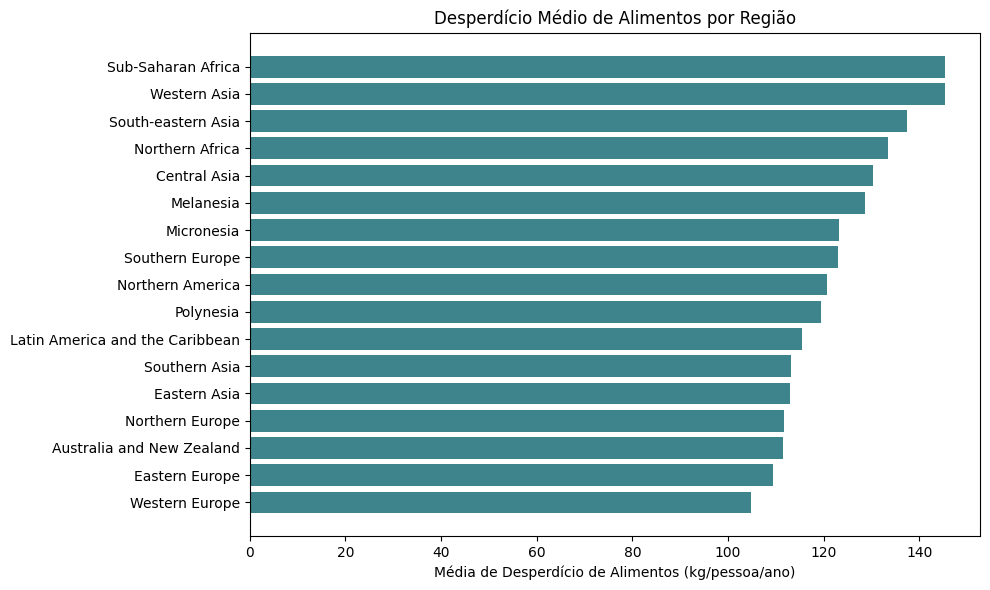

In [18]:
media_desperdicio_regiao_ordenada = media_desperdicio_regiao.sort_values(by='Desperdicio total (kg/pessoa/ano)', ascending=True)

plt.figure(figsize=(10, 6))
plt.barh(media_desperdicio_regiao_ordenada['Regiao'], media_desperdicio_regiao_ordenada['Desperdicio total (kg/pessoa/ano)'], color='#3E848C')
plt.xlabel('Média de Desperdício de Alimentos (kg/pessoa/ano)')
plt.title('Desperdício Médio de Alimentos por Região')
plt.tight_layout()
plt.show()


#### 2) Qual o desperdício médio pelas categorias: domicílios, varejo e serviços de alimentação?

In [19]:
desperdicio_medio_categoria = df[['Estimativa domiciliar (kg/pessoa/ano)', 
                                      'Estimativa no varejo (kg/pessoa/ano)', 
                                      'Estimativa no servico de alimentacao (kg/pessoa/ano)']].mean()


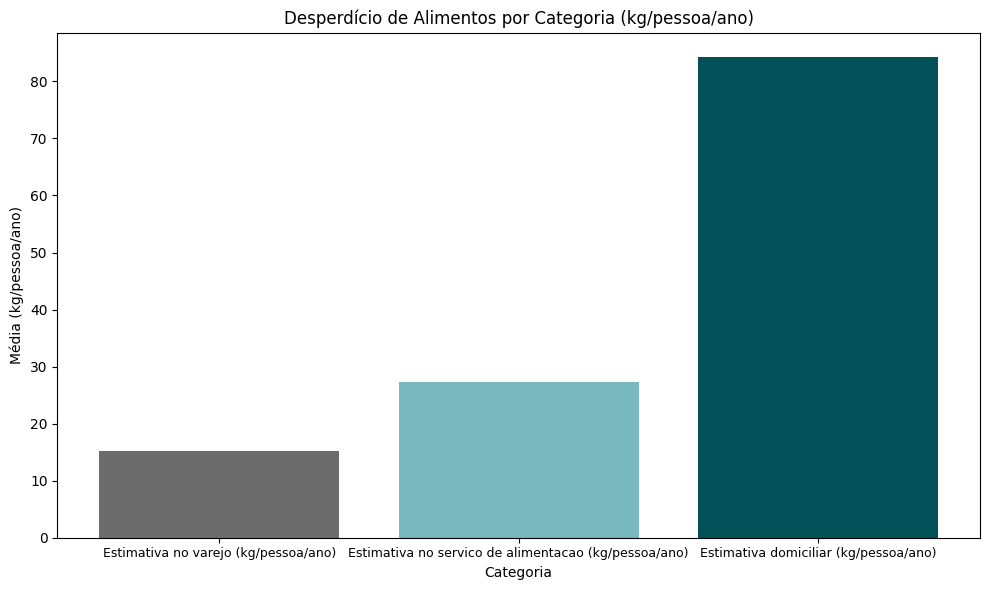

In [20]:
desperdicio_medio_categoria_ordenada = desperdicio_medio_categoria.sort_values()

plt.figure(figsize=(10, 6))
plt.bar(desperdicio_medio_categoria_ordenada.index, desperdicio_medio_categoria_ordenada.values, color=['#6c6c6c', '#7AB8BF', '#025159'])
plt.title('Desperdício de Alimentos por Categoria (kg/pessoa/ano)')
plt.ylabel('Média (kg/pessoa/ano)')
plt.xlabel('Categoria')
plt.xticks(ha='center', fontsize=9)
plt.tight_layout()

# Exibir o gráfico
plt.show()


#### 3) Quais países apresentam o menor e o maior desperdício per capita?

In [21]:
pais_maior_desperdicio = df.loc[df['Desperdicio total (kg/pessoa/ano)'].idxmax()]
pais_menor_desperdicio = df.loc[df['Desperdicio total (kg/pessoa/ano)'].idxmin()]

In [22]:
print('O país com o maior desperdício é:')
pais_maior_desperdicio[['País', 'Desperdicio total (kg/pessoa/ano)']]

O país com o maior desperdício é:


País                                 Malaysia
Desperdicio total (kg/pessoa/ano)         260
Name: 116, dtype: object

In [23]:
print('O país com o menor desperdício é:')
pais_menor_desperdicio[['País', 'Desperdicio total (kg/pessoa/ano)']]

O país com o menor desperdício é:


País                                 Slovenia
Desperdicio total (kg/pessoa/ano)          61
Name: 175, dtype: object

#### 4) Existe uma correlação entre a confiança nas estimativas e os valores de desperdício?

In [24]:
mapa_confianca = {
    'Very Low Confidence': 1,
    'Low Confidence': 2,
    'Medium Confidence': 3,
    'High Confidence': 4
}

# Criar uma nova coluna numérica para a confiança
df['Confiança Numérica'] = df['Confianca na estimativa'].map(mapa_confianca)

# Calcular a correlação entre a confiança e os valores de desperdício para cada setor
correlation_domestic = df['Confiança Numérica'].corr(df['Estimativa domiciliar (kg/pessoa/ano)'])
correlation_retail = df['Confiança Numérica'].corr(df['Estimativa no varejo (kg/pessoa/ano)'])
correlation_food_service = df['Confiança Numérica'].corr(df['Estimativa no servico de alimentacao (kg/pessoa/ano)'])

# Exibir os resultados das correlações
print("Correlação entre Confiança e Desperdício Domiciliar:", correlation_domestic)
print("Correlação entre Confiança e Desperdício no Varejo:", correlation_retail)
print("Correlação entre Confiança e Desperdício no Serviço de Alimentação:", correlation_food_service)


Correlação entre Confiança e Desperdício Domiciliar: -0.25588784619954497
Correlação entre Confiança e Desperdício no Varejo: -0.14172109604657895
Correlação entre Confiança e Desperdício no Serviço de Alimentação: -0.05431335645729698


#### 5) Existe uma correlação entre o IDH e o desperdício de comida?

In [25]:
correlacao_idh_domestico = base_final['IDH (2021)'].corr(base_final['Estimativa domiciliar (kg/pessoa/ano)'])
correlacao_idh_varejo = base_final['IDH (2021)'].corr(base_final['Estimativa no varejo (kg/pessoa/ano)'])
correlacao_idh_servico_alimentacao = base_final['IDH (2021)'].corr(base_final['Estimativa no servico de alimentacao (kg/pessoa/ano)'])

# Exibir os resultados das correlações
print("Correlação entre IDH e Desperdício Domiciliar:", correlacao_idh_domestico)
print("Correlação entre IDH e Desperdício no Varejo:", correlacao_idh_varejo)
print("Correlação entre IDH e Desperdício no Serviço de Alimentação:", correlacao_idh_servico_alimentacao)

Correlação entre IDH e Desperdício Domiciliar: 0.3949357029495211
Correlação entre IDH e Desperdício no Varejo: 0.16132526699310892
Correlação entre IDH e Desperdício no Serviço de Alimentação: 0.0801835364478134


1. Correlação entre IDH e Desperdício Domiciliar: 0.39
Interpretação: Existe uma correlação positiva moderada entre o IDH e o desperdício domiciliar. Isso sugere que, à medida que o IDH de um país aumenta, o desperdício de alimentos em domicílios também tende a aumentar, embora a correlação não seja muito forte.
Explicação possível: Em países com maior desenvolvimento humano, o poder aquisitivo pode ser maior, levando a maior consumo e, potencialmente, maior desperdício de alimentos em domicílios.
2. Correlação entre IDH e Desperdício no Varejo: 0.16
Interpretação: Existe uma correlação positiva fraca entre o IDH e o desperdício no varejo. Isso sugere que o nível de desenvolvimento humano tem pouca relação com o desperdício de alimentos no setor varejista.
Explicação possível: O setor de varejo pode ser influenciado por fatores como políticas governamentais, infraestrutura e práticas comerciais, que não são diretamente relacionados ao desenvolvimento humano medido pelo IDH.
3. Correlação entre IDH e Desperdício no Serviço de Alimentação: 0.08
Interpretação: Existe uma correlação muito fraca entre o IDH e o desperdício no setor de serviços de alimentação. A correlação próxima de zero sugere que não há uma relação clara entre o desenvolvimento humano e o desperdício de alimentos em restaurantes e serviços de alimentação.
Explicação possível: O desperdício no setor de serviços de alimentação pode ser mais influenciado por práticas locais, regulamentações e o comportamento dos consumidores, e não diretamente pelo nível de desenvolvimento humano.
Conclusão:
A correlação mais forte é entre IDH e desperdício domiciliar (0.39), sugerindo que países com maior desenvolvimento humano tendem a ter mais desperdício de alimentos em domicílios.
As correlações entre IDH e desperdício no varejo (0.16) e IDH e desperdício no serviço de alimentação (0.08) são muito fracas, indicando que o desenvolvimento humano não tem uma relação forte com o desperdício nesses setores.
Esses resultados sugerem que, enquanto o IDH pode influenciar o desperdício de alimentos em domicílios, ele não é um fator determinante no desperdício no varejo e serviços de alimentação.